# Breast Cancer prediction

Breast cancer is cancer that forms in the cells of the breasts.<p>It arises in the lining cells (epithelium) of the ducts (85%) or lobules (15%) in the glandular tissue of the breast. Initially, the cancerous growth is confined to the duct or lobule (“in situ”) where it generally causes no symptoms and has minimal potential for spread (metastasis).<br>
    
Most types of breast cancer are easy to diagnose by microscopic analysis of a sample - or biopsy - of the affected area of the breast. Also, there are types of breast cancer that require specialized lab exams.

# 1. Importing all necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

from sklearn.preprocessing import StandardScaler



In [2]:
df=pd.read_csv('data.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.shape

(569, 33)

In [5]:
# displaying first five rows
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
# concise summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
# column names
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [8]:
# checking for null values
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

The whole column 'Unamed: 32' has NaN values.

In [9]:
# dropping 'Unnamed: 32' column.
df.drop('Unnamed: 32', axis=1,inplace=True)

In [10]:
# dropping id column
df.drop('id',axis=1, inplace=True)

In [11]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# 2.Data Visualization

# 2.1 Univariate Analysis

# 2.1.1 Diagnosis

In [63]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [64]:
df['diagnosis'].value_counts()/len(df)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

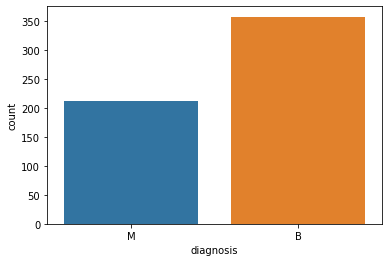

In [39]:
sns.countplot('diagnosis',data=df)

# 2.1.2 radius_mean

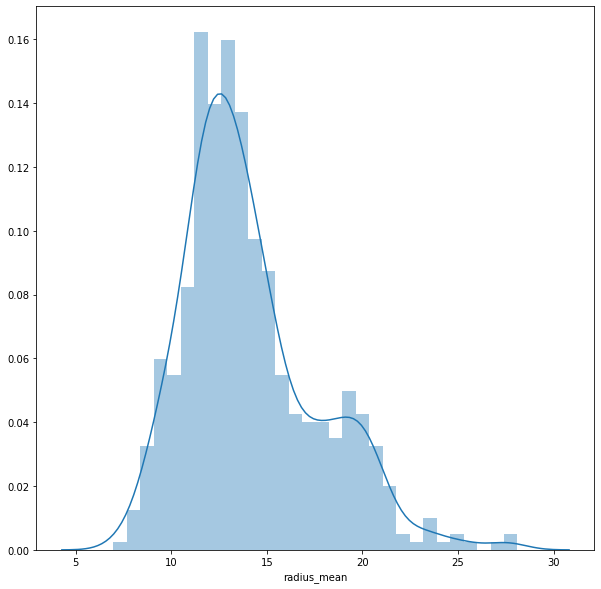

In [324]:
plt.figure(figsize = (10,10))
sns.distplot(df['radius_mean'],bins=30)
plt.show()

In [325]:
df['radius_mean'].describe()

count    569.000000
mean      14.127292
std        3.524049
min        6.981000
25%       11.700000
50%       13.370000
75%       15.780000
max       28.110000
Name: radius_mean, dtype: float64

# 2.1.3 Radius Worst

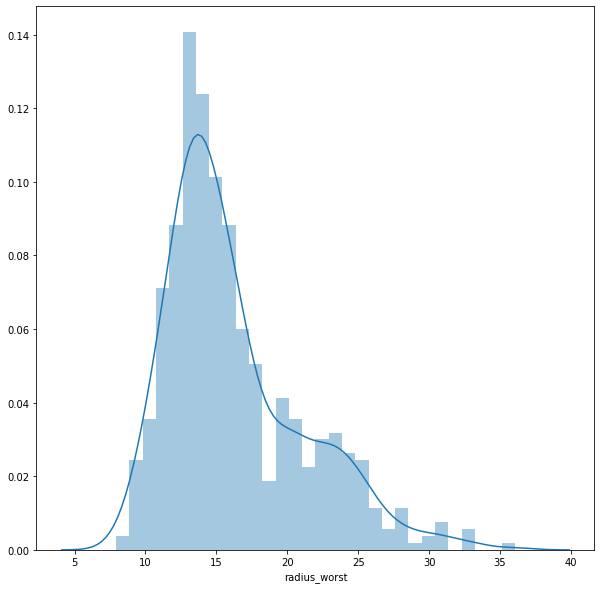

In [33]:
plt.figure(figsize = (10,10))
sns.distplot(df['radius_worst'],bins=30)
plt.show()

In [34]:
df['radius_worst'].describe()

count    569.000000
mean      16.269190
std        4.833242
min        7.930000
25%       13.010000
50%       14.970000
75%       18.790000
max       36.040000
Name: radius_worst, dtype: float64

# 2.1.4 Perimeter Mean

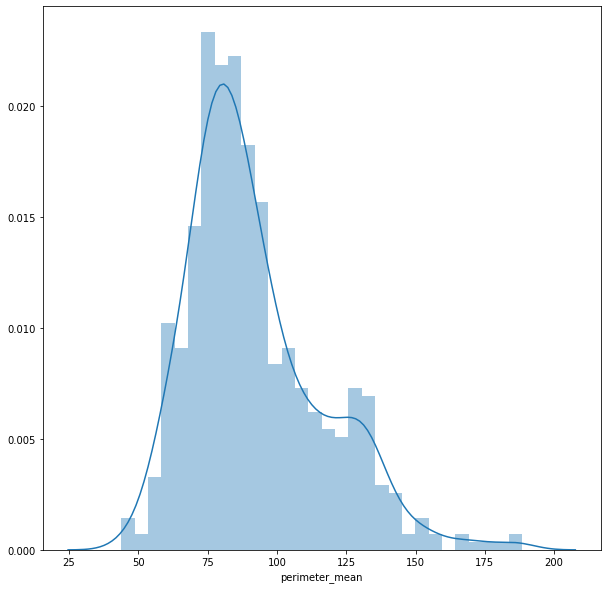

In [44]:
plt.figure(figsize = (10,10))
sns.distplot(df['perimeter_mean'],bins=30)
plt.show()

In [43]:
df['perimeter_mean'].describe()

count    569.000000
mean      91.969033
std       24.298981
min       43.790000
25%       75.170000
50%       86.240000
75%      104.100000
max      188.500000
Name: perimeter_mean, dtype: float64

# 2.1.5 Compactness mean

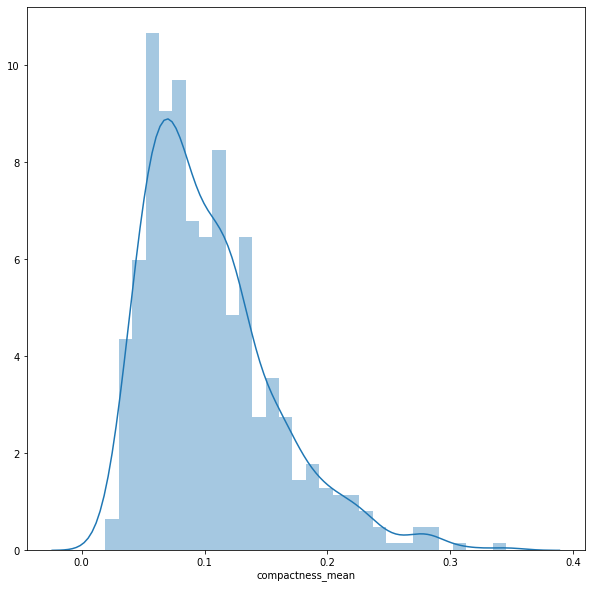

In [15]:
plt.figure(figsize = (10,10))
sns.distplot(df['compactness_mean'],bins=30)
plt.show()

In [16]:
df['compactness_mean'].describe()

count    569.000000
mean       0.104341
std        0.052813
min        0.019380
25%        0.064920
50%        0.092630
75%        0.130400
max        0.345400
Name: compactness_mean, dtype: float64

In [41]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# 2.2 MultiVariate Analysis

<AxesSubplot:>

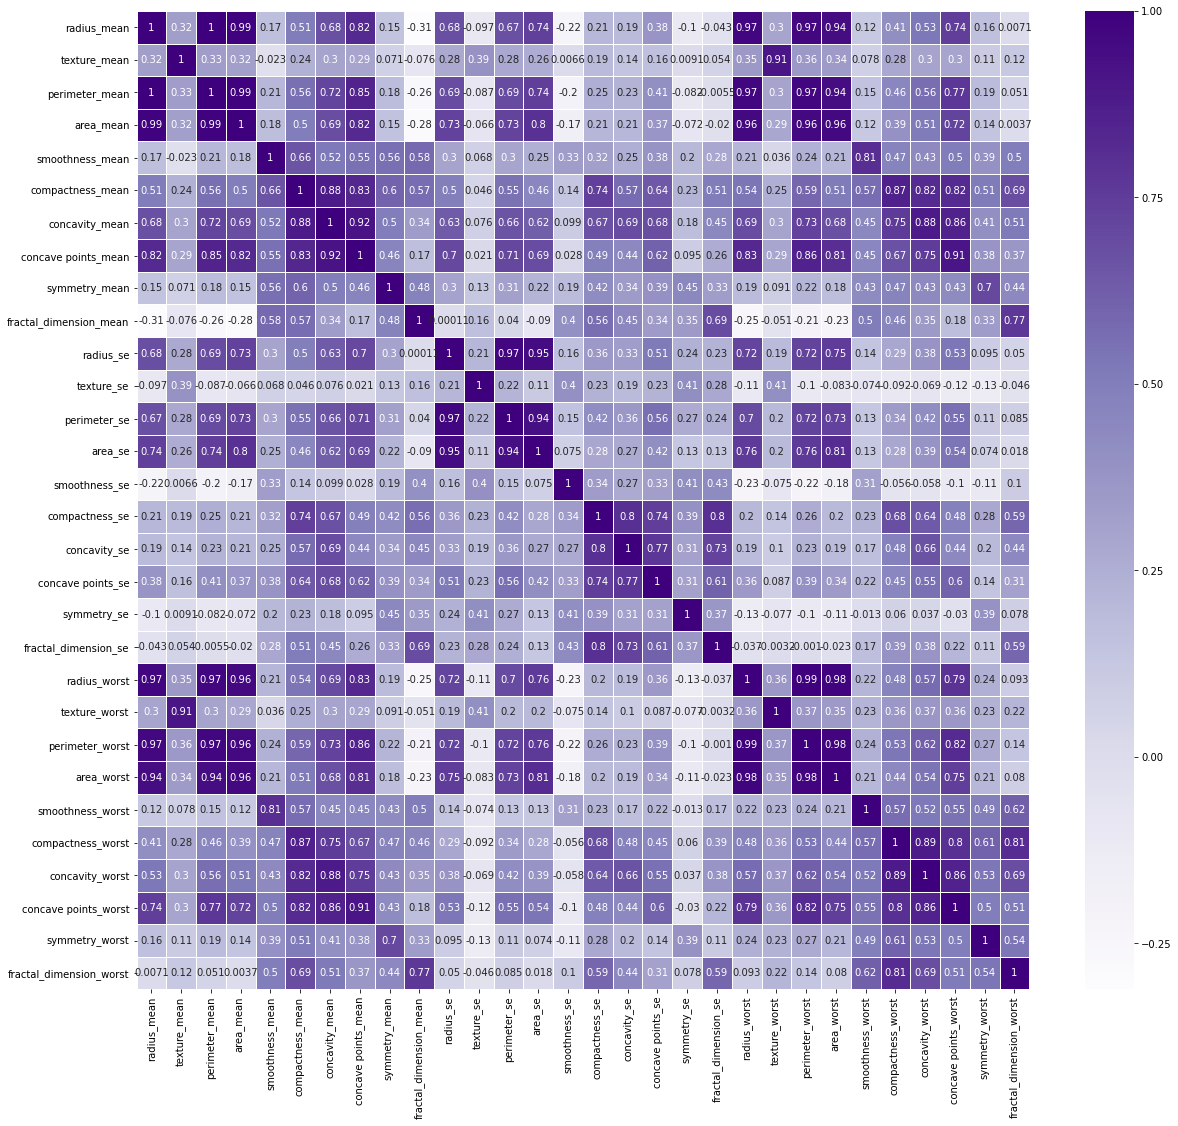

In [25]:
# heatmap
plt.figure(figsize=(20,18))
sns.heatmap(df.corr(),annot=True,linewidths=.5, cmap="Purples")

From the heatmap, we can observe from the heatmaps that there are many negative correlations in this dataset.

In [35]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [36]:
# Getting Mean Columns with diagnosis
m_col = ['diagnosis','radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

# Getting Se Columns with diagnosis
s_col = ['diagnosis','radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se']

# Getting Worst column with diagnosis
w_col = ['diagnosis','radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

# 2.2.1 For Mean Columns

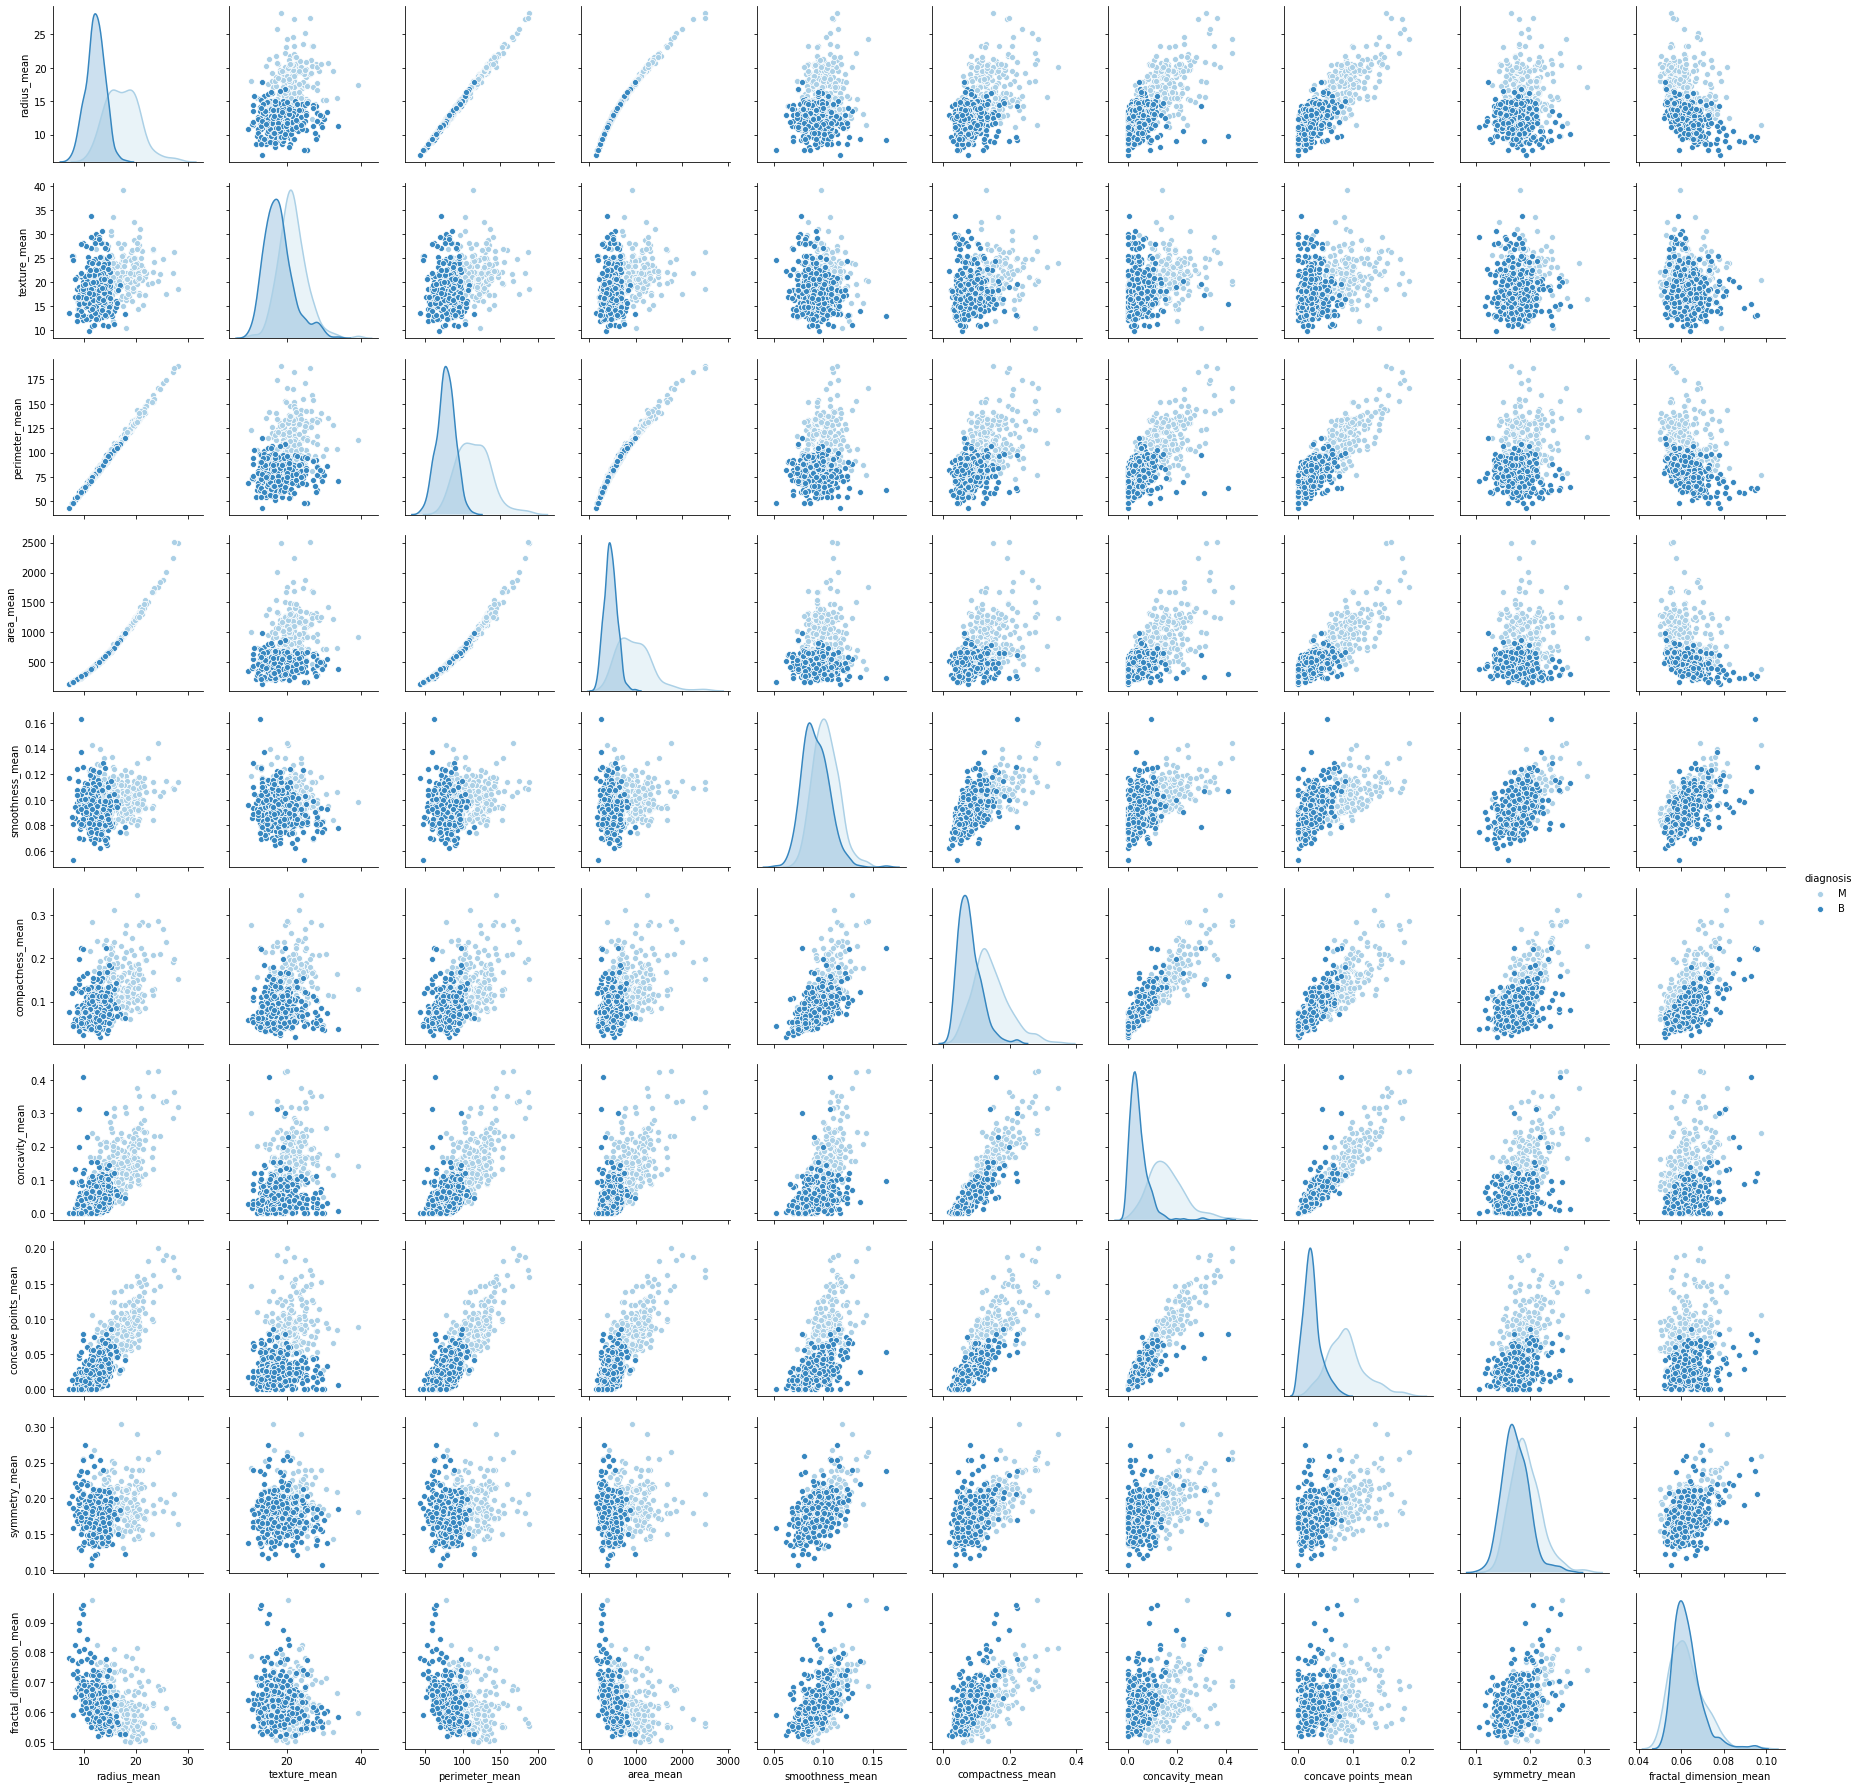

In [14]:
# pairplot for mean columns
sns.pairplot(df[m_col],hue = 'diagnosis', palette='Blues')

# 2.2.2 For SE Columns

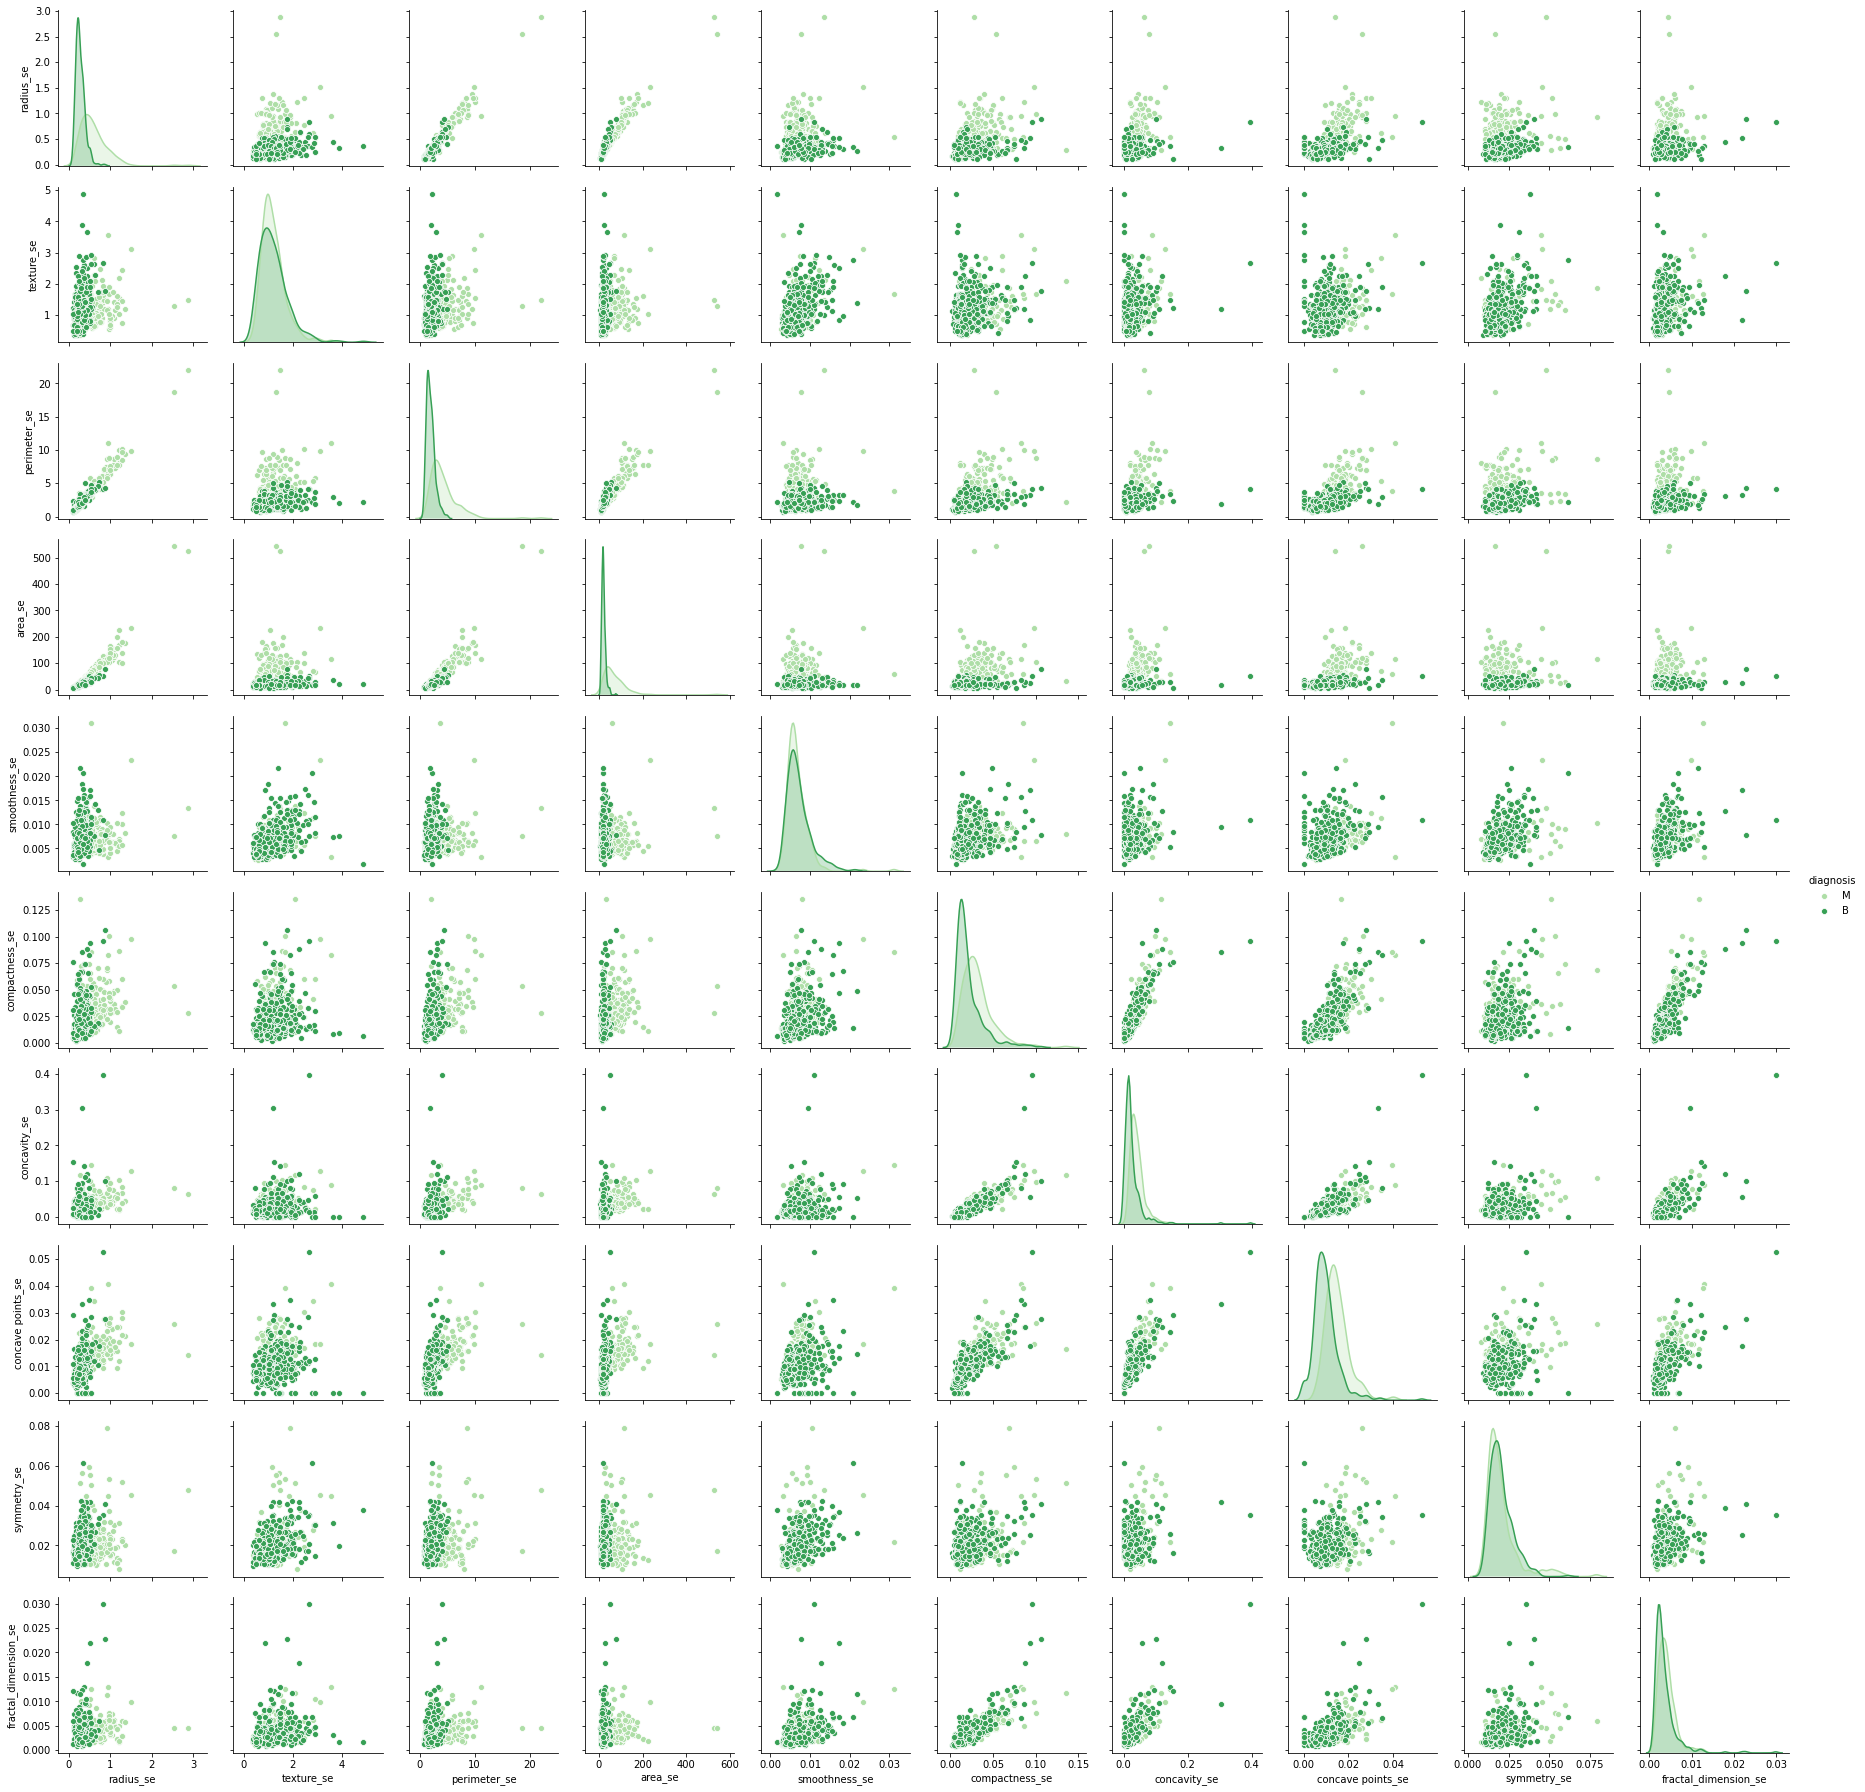

In [16]:
# pairplot for se columns
sns.pairplot(df[s_col],hue = 'diagnosis', palette='Greens')

# 2.2.3 For Worst Columns

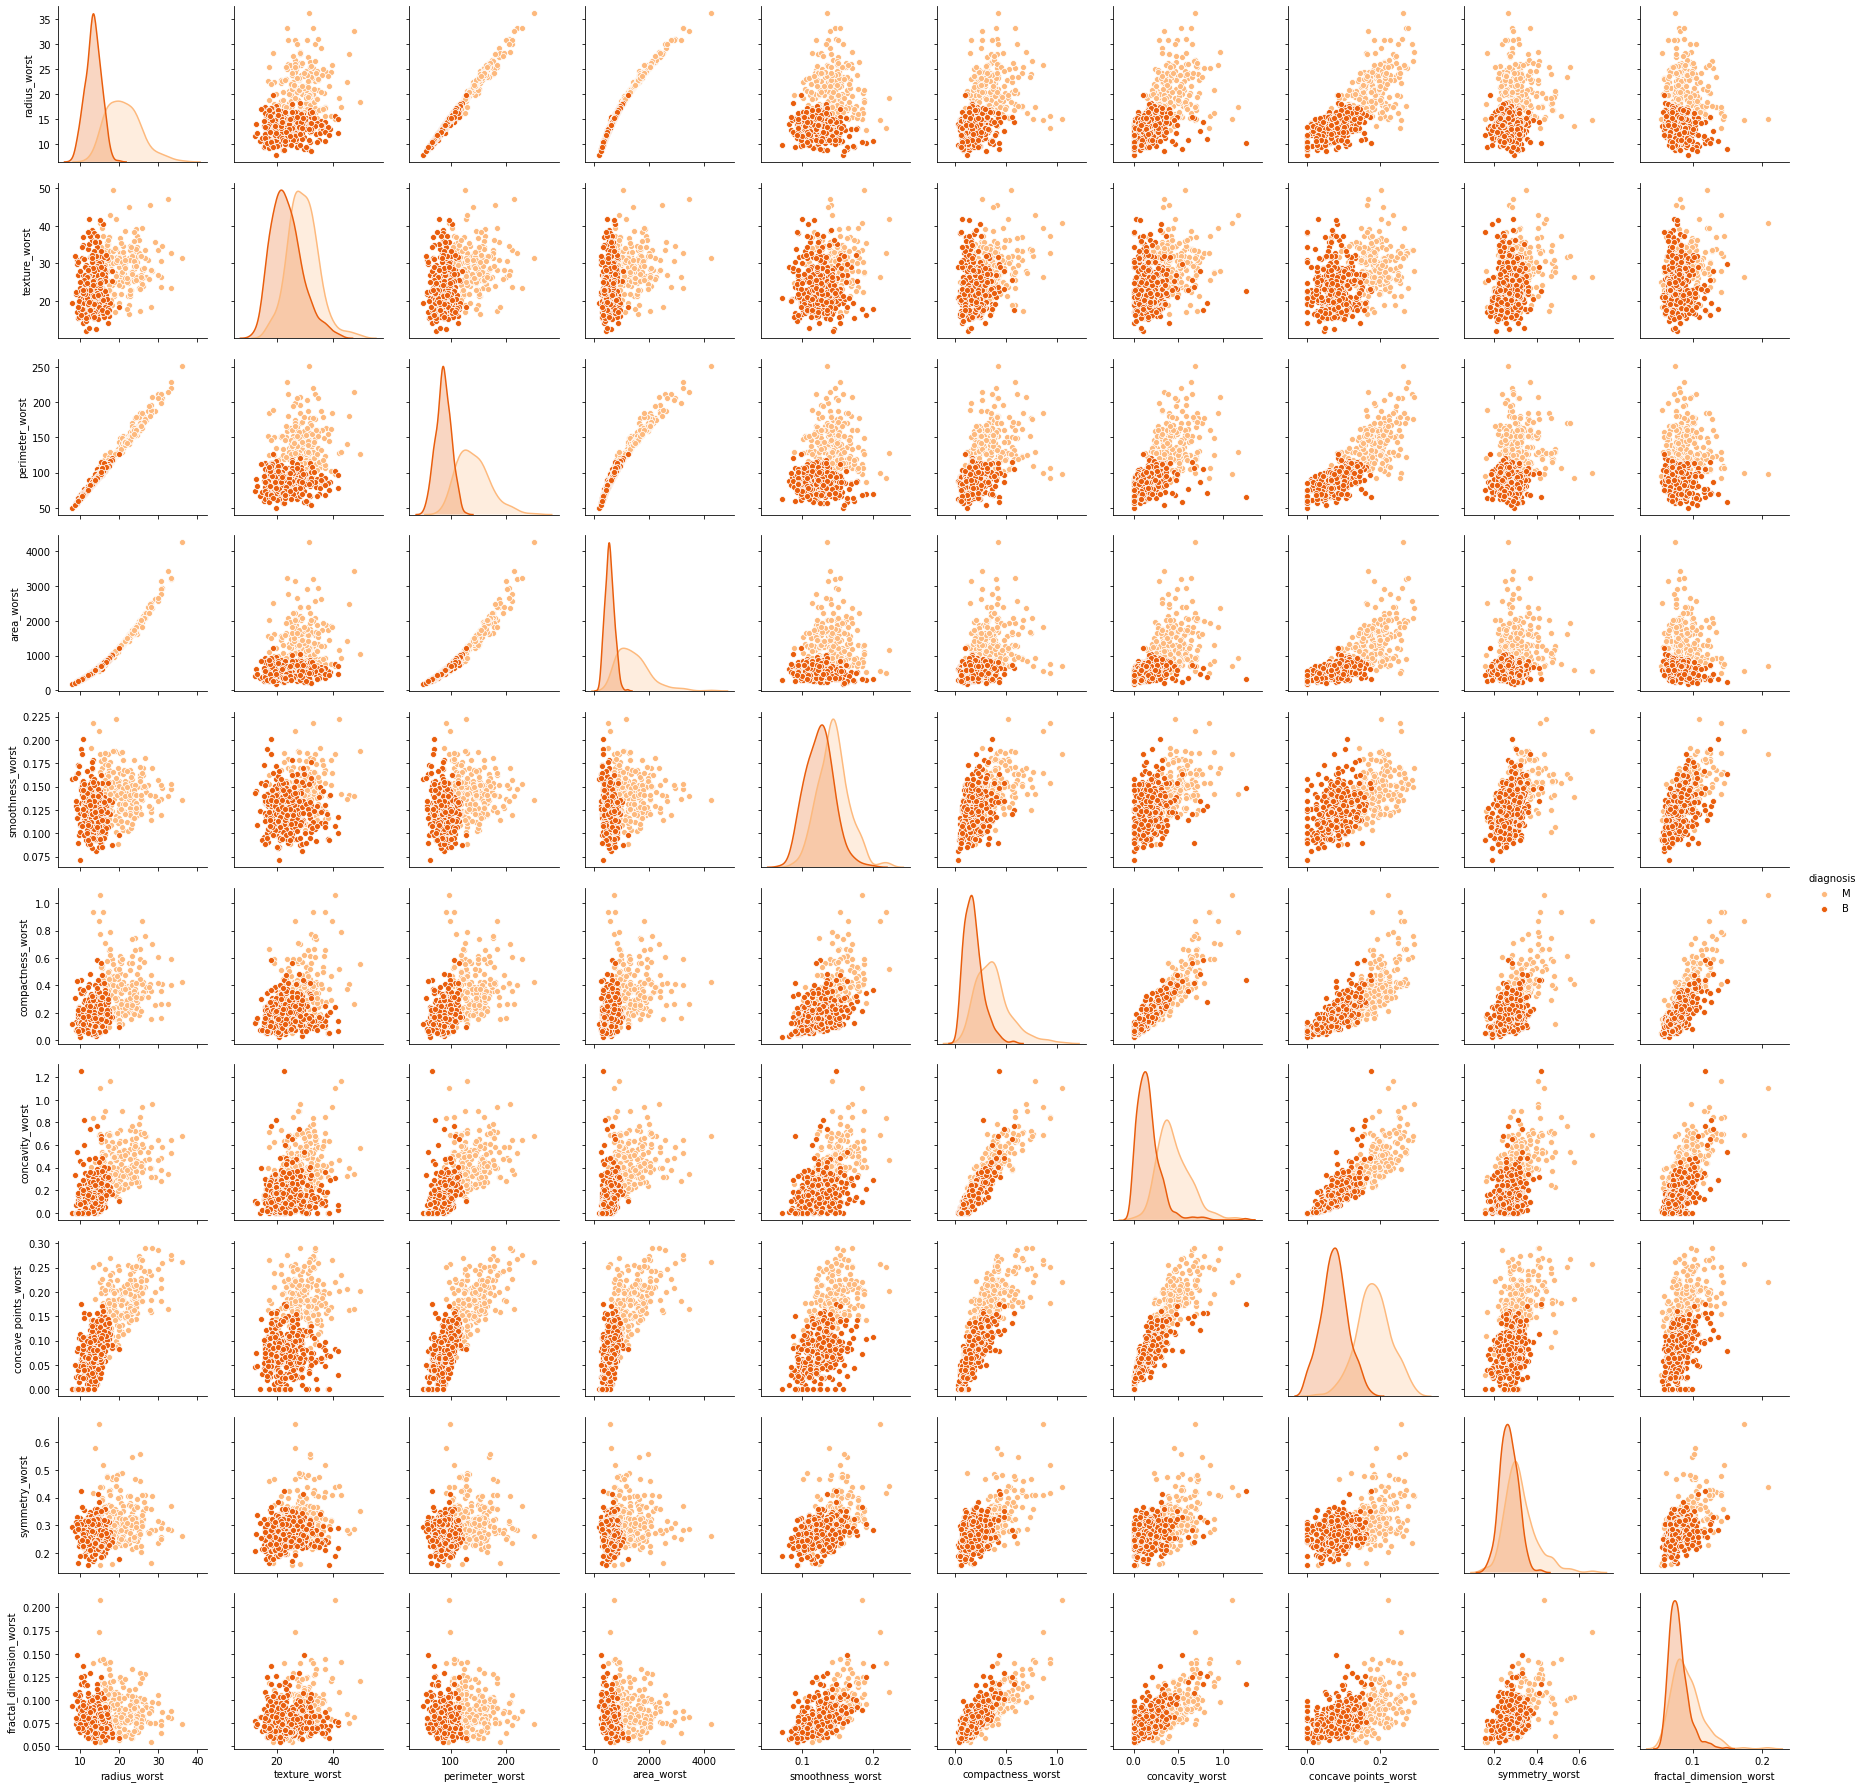

In [17]:
# pairplot for worst columns
sns.pairplot(df[w_col],hue = 'diagnosis', palette='Oranges')

# 3. Data Preprocessing

# 3.1 Checking for null Values

In [20]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

As we can say there is no null values in the dataset. So we can skip this step.

# 3.2 Encoding of Categorical Variables

In [13]:
# mapping categorical values to numerical values
df['diagnosis']=df['diagnosis'].map({'B':0,'M':1})

In [14]:
# Now i am creating the copies of dataset for each of the model

In [15]:
df1=df.copy(deep=True)

In [16]:
df2=df.copy(deep=True)
df3=df.copy(deep=True)

In [17]:
df.shape, df1.shape,df2.shape,df3.shape

((569, 31), (569, 31), (569, 31), (569, 31))

In [18]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [19]:
df1.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# 4. Model Building

In [20]:
col=['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

In [21]:
X=df.drop('diagnosis', axis=1)
y=df['diagnosis']

# 4.1 Decision Tree

In [23]:


# splitting data
X_train, X_test, y_train, y_test = train_test_split(
                X,y,
                test_size=0.2,
                random_state=1)

In [24]:
clf= DecisionTreeClassifier()

grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,8,1),
    'min_samples_leaf' : range(1,8,1),
    'min_samples_split': range(2,8,1),
   
    
}
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 8),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 8)})

In [25]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 4}


In [26]:
clf= DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf= 5, min_samples_split= 4, splitter='best')

clf.fit(X_train, y_train)
test_pred = clf.predict(X_test)

In [27]:
train_pred = clf.predict(X_train)
auc = roc_auc_score(y_train, train_pred)
print('\nTrain auc  is %f%%' ,auc)


Train auc  is %f%% 0.9882868937048503


In [28]:
test_auc = roc_auc_score(y_test, test_pred)
print('\n****Test auc  is %f%%' % (test_auc))


****Test auc  is 0.938492%


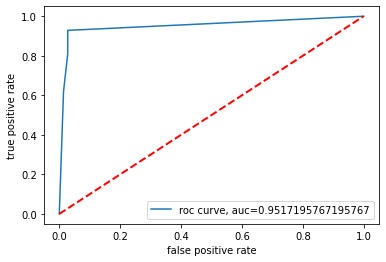

In [29]:
lw = 2
pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  pred_proba)
auc = metrics.roc_auc_score(y_test, pred_proba)
plt.plot(fpr,tpr,label="roc curve, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc=4)
plt.show()

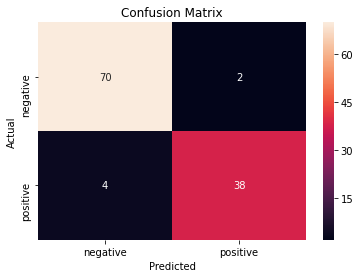

In [31]:
conf_matrix = confusion_matrix(y_test, test_pred)
class_label = ['negative', 'positive']
df_conf_matrix = pd.DataFrame(
    conf_matrix, index=class_label, columns=class_label)
sns.heatmap(df_conf_matrix, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 4.2 Feature Importance in Decision Tree

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.03011
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00192
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.04357
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.07775
Feature: 22, Score: 0.76122
Feature: 23, Score: 0.03757
Feature: 24, Score: 0.00189
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.04597
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000


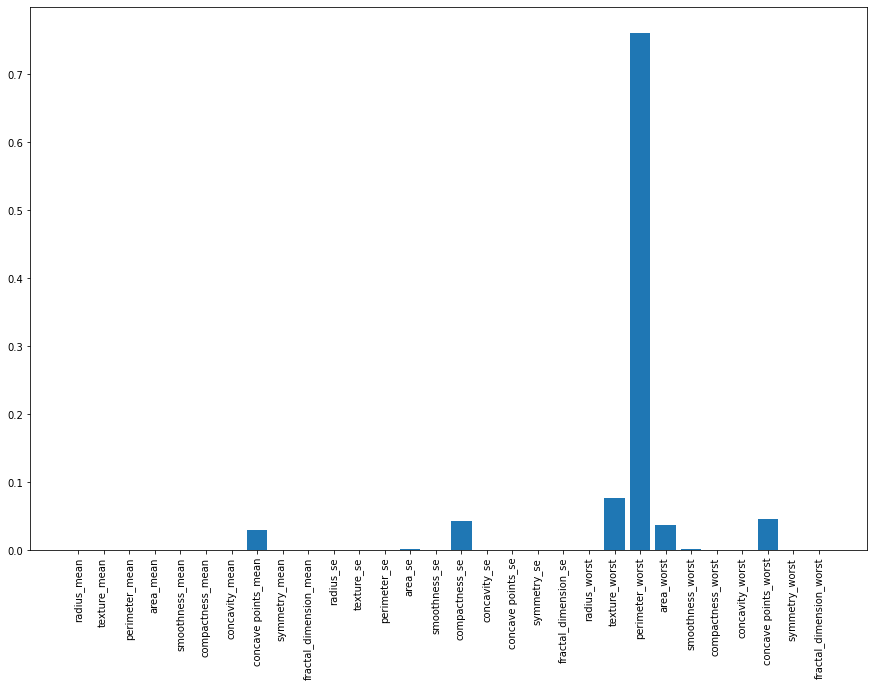

In [30]:

importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(15,10))
plt.bar(X.columns, importance)
plt.xticks(rotation=90)

plt.show()

* The most important features are "radius_worst"
* The lkist of the important featuires are --Radius_worst, texture_worst, concave point worst, texture mean, concavity features, etc
* Those features wholse value is almost equal to 0 , are least important features. 
* Least features can be removed form the dataset and the dataset will be used for prediction. 

# 4.3 XG-Boost

In [32]:
X1=df1.drop('diagnosis', axis=1)
y1=df1['diagnosis']

In [33]:
# splitting data
X_train, X_test, y_train, y_test = train_test_split(
                X1,y1,
                test_size=0.2,
                random_state=1)

In [34]:
param_grid={'n_estimators': [10,20,50,100,500], 'max_depth':[1, 5, 10, 50,100,500]}
xgb = XGBClassifier(n_jobs= -1)
grid = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

optimal_learners = grid.best_estimator_.n_estimators

print("The optimal number of base learners is : ",optimal_learners)

optimal_depth = grid.best_estimator_.max_depth
print("\nThe optimal value of depth is : ",optimal_depth)

The optimal number of base learners is :  500

The optimal value of depth is :  1


In [35]:
xgb = XGBClassifier(n_estimators= 500, max_depth= 1, n_jobs= -1)
xgb.fit(X_train, y_train)
test_pred = xgb.predict(X_test)

In [36]:
train_pred = xgb.predict(X_train)
auc = roc_auc_score(y_train, train_pred)
print('\nTrain auc  is' ,auc)


Train auc  is 1.0


In [37]:
test_auc = roc_auc_score(y_test, test_pred)
print('\nTest auc  is %f%%' % (test_auc))



Test auc  is 0.940476%


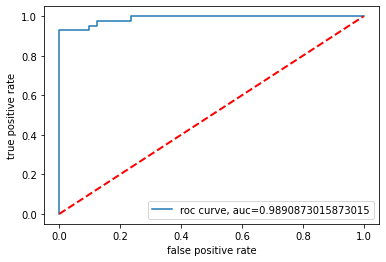

In [38]:
lw = 2
pred_proba = xgb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  pred_proba)
auc = metrics.roc_auc_score(y_test, pred_proba)
plt.plot(fpr,tpr,label="roc curve, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc=4)
plt.show()

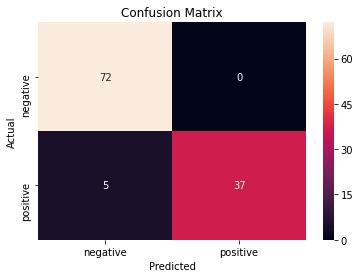

In [39]:
conf_matrix = confusion_matrix(y_test, test_pred)
class_label = ['negative', 'positive']
df_conf_matrix = pd.DataFrame(
    conf_matrix, index=class_label, columns=class_label)
sns.heatmap(df_conf_matrix, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 4.4 Feature Importance using Xg-Boost

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00686
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00063
Feature: 4, Score: 0.00138
Feature: 5, Score: 0.00186
Feature: 6, Score: 0.00075
Feature: 7, Score: 0.06911
Feature: 8, Score: 0.00129
Feature: 9, Score: 0.00025
Feature: 10, Score: 0.01367
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00372
Feature: 13, Score: 0.00928
Feature: 14, Score: 0.00026
Feature: 15, Score: 0.00164
Feature: 16, Score: 0.00191
Feature: 17, Score: 0.00104
Feature: 18, Score: 0.00041
Feature: 19, Score: 0.00108
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00917
Feature: 22, Score: 0.52348
Feature: 23, Score: 0.02494
Feature: 24, Score: 0.00584
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.02538
Feature: 27, Score: 0.29413
Feature: 28, Score: 0.00126
Feature: 29, Score: 0.00066


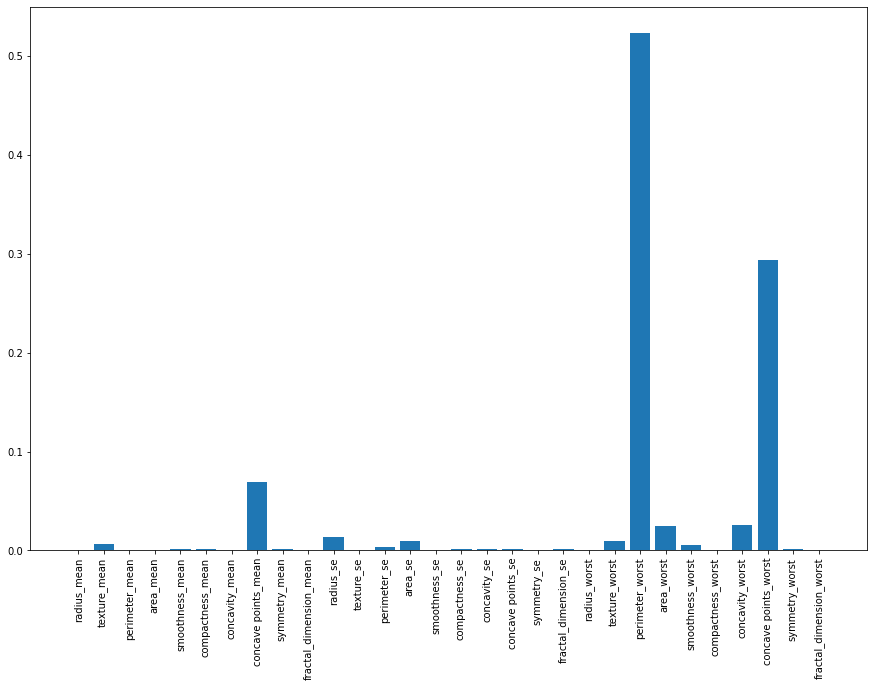

In [40]:
# get importance
importance = xgb.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(15,10))
plt.bar(X1.columns, importance)
plt.xticks(rotation=90)

plt.show()

* The most important features is Radius Worst
* As we can see that Concave points Worst is 2nd important features.

#  4.5 KNN

In [41]:
X2=df2.drop('diagnosis', axis=1)
y2=df2['diagnosis']

In [42]:
from sklearn.model_selection import train_test_split

# splitting data
X_train, X_test, y_train, y_test = train_test_split(
                X2,y2,
                test_size=0.2,
                random_state=1)

In [43]:
n_neighbors = [3,5,7,9,11,13,15,17]

tr_list = []
for i in n_neighbors:
    lr =KNeighborsClassifier(n_neighbors=i)
    lr.fit(X_train, y_train)
    pred = lr.predict(X_train)
    auc = roc_auc_score(y_train, pred)
    tr_list.append(auc.mean())
    print('\nTrain auc for n_neighbors = %f is %f%%' % (i, auc))


Train auc for n_neighbors = 3.000000 is 0.941228%

Train auc for n_neighbors = 5.000000 is 0.938906%

Train auc for n_neighbors = 7.000000 is 0.915996%

Train auc for n_neighbors = 9.000000 is 0.917750%

Train auc for n_neighbors = 11.000000 is 0.925387%

Train auc for n_neighbors = 13.000000 is 0.918318%

Train auc for n_neighbors = 15.000000 is 0.924200%

Train auc for n_neighbors = 17.000000 is 0.923013%


In [44]:
lr = KNeighborsClassifier(n_neighbors=3)
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
auc = roc_auc_score(y_test, pred)
print('\n****Test auc for n_neighbors=3 is %f%%' % (auc))


****Test auc for n_neighbors=3 is 0.907738%


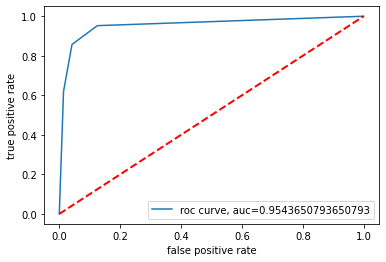

In [45]:
lw = 2
pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  pred_proba)
auc = metrics.roc_auc_score(y_test, pred_proba)
plt.plot(fpr,tpr,label="roc curve, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc=4)
plt.show()

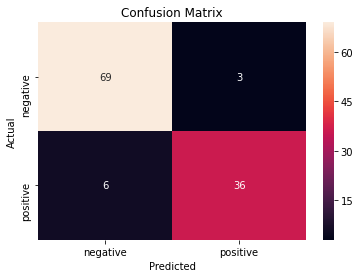

In [46]:
conf_matrix = confusion_matrix(y_test, pred)
class_label = ['negative', 'positive']
df_conf_matrix = pd.DataFrame(
    conf_matrix, index=class_label, columns=class_label)
sns.heatmap(df_conf_matrix, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 4.6 Feature Importance using KNN

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00281
Feature: 2, Score: 0.00141
Feature: 3, Score: 0.07487
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00351
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00141
Feature: 22, Score: 0.00387
Feature: 23, Score: 0.41125
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000


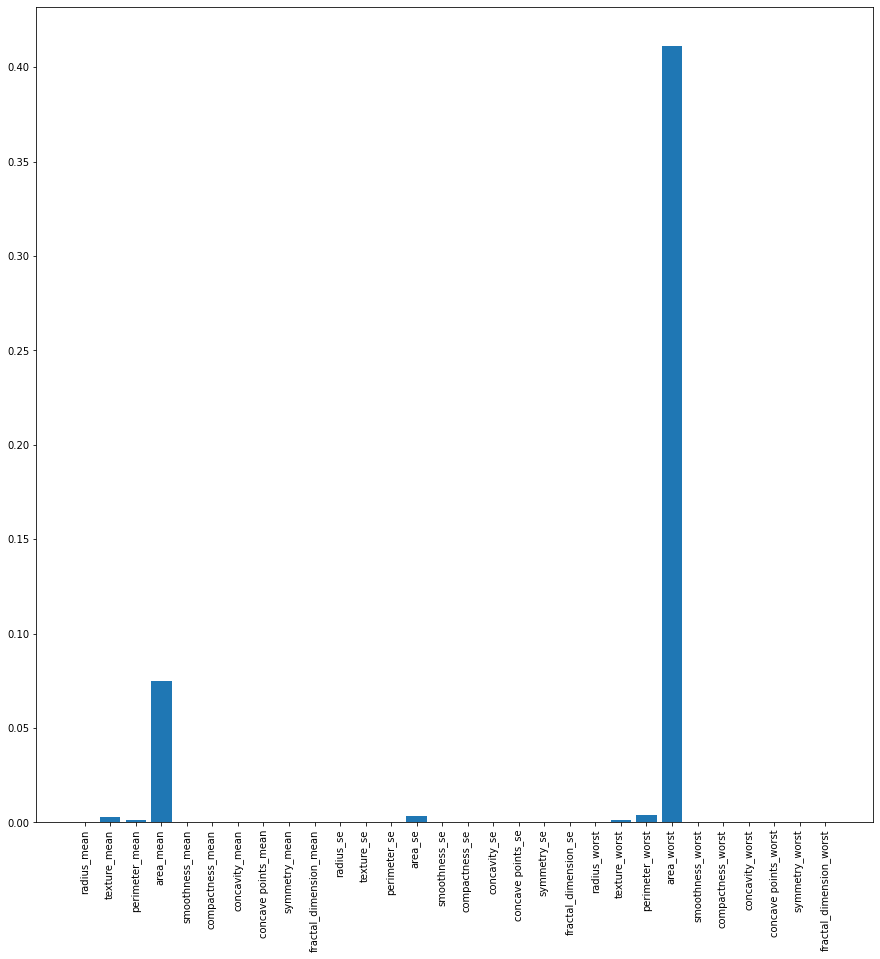

In [47]:

# perform permutation importance
results = permutation_importance(lr, X2, y2, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
for i,v in enumerate(importance):
    print('Feature: %d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(15,15))
plt.bar(X2.columns, importance)
plt.xticks(rotation=90)

plt.show()

* The most imprtant features is Area worst
* The 2nd most important feature is Area Mean
* as we can see that there is only 4 features which is important

# 4.7 Logistic Regression

In [48]:
X3=df3.drop('diagnosis', axis=1)
y3=df3['diagnosis']

In [49]:
col=['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

In [50]:
scaler = StandardScaler()
scaler.fit(X3)
X3 = scaler.transform(X3)

In [51]:
# splitting data
X_train, X_test, y_train, y_test = train_test_split(
                X3,y3,
                test_size=0.2,
                random_state=1)

In [52]:
c = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

tr_list = []
for i in c:
    lr = LogisticRegression(penalty='l2', C=i, n_jobs=-1)
    lr.fit(X_train, y_train)
    pred = lr.predict(X_train)
    auc = roc_auc_score(y_train, pred)
    tr_list.append(auc.mean())
    print('\nTrain auc for C = %f is %f%%' % (i, auc))


Train auc for C = 0.000010 is 0.500000%

Train auc for C = 0.000100 is 0.523529%

Train auc for C = 0.001000 is 0.874716%

Train auc for C = 0.010000 is 0.935294%

Train auc for C = 0.100000 is 0.980599%

Train auc for C = 1.000000 is 0.989422%

Train auc for C = 10.000000 is 0.989422%

Train auc for C = 100.000000 is 0.989422%

Train auc for C = 1000.000000 is 0.995304%

Train auc for C = 10000.000000 is 0.994118%


In [53]:
lr = LogisticRegression(penalty='l2', C=1000, n_jobs=-1)
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
auc = roc_auc_score(y_test, pred)
print('\n****Test auc for C = 1000 is %f%%' % (auc))


****Test auc for C = 1000 is 0.974206%


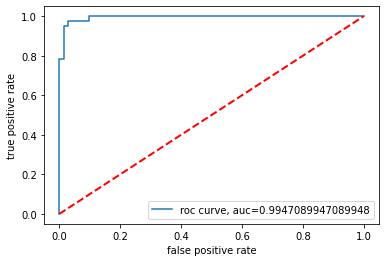

In [54]:
lw = 2
pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  pred_proba)
auc = metrics.roc_auc_score(y_test, pred_proba)
plt.plot(fpr,tpr,label="roc curve, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc=4)
plt.show()

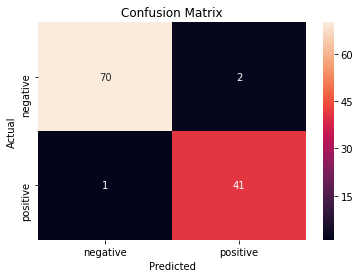

In [55]:
conf_matrix = confusion_matrix(y_test, pred)
class_label = ['negative', 'positive']
df_conf_matrix = pd.DataFrame(
    conf_matrix, index=class_label, columns=class_label)
sns.heatmap(df_conf_matrix, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 4.8 Feature Importance using Logistic Regression

Feature: 0, Score: -17.16236
Feature: 1, Score: -1.05152
Feature: 2, Score: -12.02474
Feature: 3, Score: 9.68438
Feature: 4, Score: 1.93395
Feature: 5, Score: -15.18111
Feature: 6, Score: 8.94134
Feature: 7, Score: 15.05524
Feature: 8, Score: -5.15567
Feature: 9, Score: 1.54729
Feature: 10, Score: 12.64438
Feature: 11, Score: -3.28369
Feature: 12, Score: -10.93791
Feature: 13, Score: 19.64503
Feature: 14, Score: -1.68205
Feature: 15, Score: 3.67088
Feature: 16, Score: -8.72388
Feature: 17, Score: 14.64369
Feature: 18, Score: -0.64784
Feature: 19, Score: -12.26108
Feature: 20, Score: -1.40850
Feature: 21, Score: 8.20640
Feature: 22, Score: 17.58703
Feature: 23, Score: 23.44905
Feature: 24, Score: 1.01063
Feature: 25, Score: -8.36017
Feature: 26, Score: 10.44810
Feature: 27, Score: -2.96107
Feature: 28, Score: 5.81594
Feature: 29, Score: 12.61113


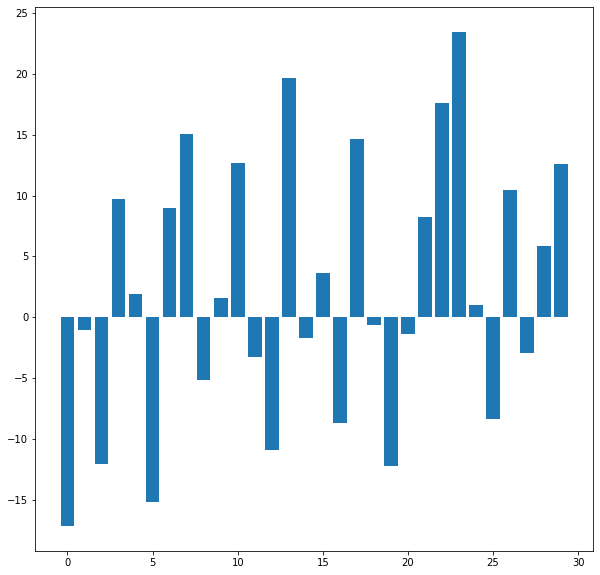

In [56]:
importance = lr.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(10,10))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

* For Some Algorithms Standarization affect the features importance of the dataset
* As in above graph we can see that there wwre few features whose values were either too negative or positive. Rest of the features had almost 0
* After standarization we can see that a lot of the features wholse coefficeint values are much better. 
* Here negative values indicate that it tries to push the model towards the negative side
* Same case with the positive value which tends to push the model in positive side.

# 5. Conclusion

In [7]:
result= { 'Decision Tree' : [98.94,93.84], 'Xg-Boost':[1.0,94.04],'KNN':[94.12,90.77],
       'Logistic Regression':[99.53,97.42]}

In [8]:
import pandas as pd
result= pd.DataFrame.from_dict(data=result,orient='index',columns= ['Training AUC Score','Testing AUC Score'])

In [9]:
result

,Training AUC Score,Testing AUC Score
Decision Tree,98.94,93.84
Xg-Boost,1.00,94.04
KNN,94.12,90.77
Logistic Regression,99.53,97.42
